# General Social Survey Project
*Tiffany Bui, Kevin Ma, Oliver Mills, Zach Russell, Malek Thabet, Jonah Werbel*

## Summary

This project took data from the General Social Survey to explore trends in income equality dependant on different demographic variables. In considering changes across years, different sexes, ages, races, and more variables (described below), we managed to identify which variables appear to play more of a factor and have more correlation to income. Money has a different value throughout time, so the `conrinc` variable was used to see income adjusted for inflation. We found that people for whom any of the following apply tend to have a higher income than those without: white, male, married, excellent health, and/or a graduate degree.

Readers will find work below which defines the problem in more detail, cleans the relevant data, and creates relevant visualizations with commentary and analysis before reaching our conclusion.

## Defining the Project Problem and Importance

The GSS is one of the most immense collections of survey data ever collected. The survey covers respondents informatin regarding age, gender, race / ethnicity, education level, marital status, employment status, and so much more.


Income inequality is a significant societal issue. By analyzing income disparities across demogrpahic groups, our group aims to identify which subsets of people are most affected by this disparity. By examining income levels by various factors, our team aims to uncover patterns of inequality that can be used to motivate a response to address them.


Additonally, by better understanding relationships between income and these varying factors, researchers may be better able to understand something as complex as societal dynamics and human behavior. <br>

Whatever the reason may be further understanding this complex topic, our goal is not to address one external motivator or another (such as policy influence of psychological influence). Instead, our team simply aims to highlight income disparity within the following demographic variables:

**year** - Year response was collected

**sex** - Respondent's sex

**age** - Respondent's age

**race** - Respondent's race

**marital** - Respondent's marital status

**health** - Respondent's health: excellent, good, fair, poor

**degree** - Respondent's highest level of schooling or degree earned

Lastly, the income variable chosen was:

**conrinc** - Respondent's infaltion adjusted personal income. Chosen as it is frequently asked throughout the years, while adjusting for changes in dollar values across the 16 years of the survey that we are working worth (2006-2022)

We did not consider work status as the primary aim of this project pertains to the effect demographic variables have on income.





## Data Access, Cleaning

### Getting the GSS Data

The following code chunks can be run to get the data

In [ ]:
import pandas as pd
#
var_list = ['wrkstat', 'prestige'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [ ]:
# clean code
# start by looking for any NA's to handle

df.describe()


,year,id,hrs1,hrs2,occ,prestige,commute,prestg80,indus07,occonet,...,agehef8,agehef9,agehef11,hompoph,wtssps_nea,wtssnrps_nea,wtssps_next,wtssnrps_next,wtsscomp,wtsscompnr
count,24130.000000,24130.000000,13712.000000,479.000000,0.0,0.0,0.0,6431.000000,1814.000000,1847.000000,...,3.000000,2.000000,42.000000,3540.000000,843.000000,843.000000,1235.000000,1235.000000,24130.000000,24130.000000
mean,2015.050974,1660.270949,41.155849,38.970772,NaN,NaN,NaN,43.566475,555467.982359,355333.225322,...,33.666667,50.000000,4.904762,1.821469,1.000000,1.000000,1.000000,1.000000,0.996945,0.994487
std,5.526059,1106.843749,14.205623,13.059695,NaN,NaN,NaN,13.872802,182277.853905,127688.069583,...,56.580326,69.296465,14.943486,0.870081,1.252159,1.251813,1.266347,1.180530,0.804696,0.809929
min,2006.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,17.000000,111211.000000,111011.000000,...,1.000000,1.000000,1.000000,1.000000,0.112206,0.049729,0.106381,0.090816,0.073972,0.076104
25%,2010.000000,763.000000,36.000000,35.000000,NaN,NaN,NaN,32.000000,446110.000000,254021.000000,...,1.000000,25.500000,1.000000,1.000000,0.364248,0.307250,0.358660,0.339571,0.509974,0.505924
50%,2016.000000,1525.000000,40.000000,40.000000,NaN,NaN,NaN,42.000000,561422.000000,395092.000000,...,1.000000,50.000000,2.000000,2.000000,0.628251,0.570879,0.598251,0.602136,0.783825,0.774566
75%,2021.000000,2337.750000,49.000000,45.000000,NaN,NaN,NaN,51.000000,623110.000000,439021.500000,...,50.000000,74.500000,4.000000,2.000000,1.188035,1.169048,1.089063,1.207341,1.185381,1.195842
max,2022.000000,4510.000000,89.000000,84.000000,NaN,NaN,NaN,86.000000,928120.000000,537121.000000,...,99.000000,99.000000,99.000000,9.000000,17.815383,16.167341,14.499165,13.168541,14.272462,17.003078


In [ ]:
print(df.shape)

(24130, 6694)


### Cleaning

I start by looking for missing data. I see there are NaN values for the variables occ, prestige, and commute. The dimensions show that there are 24130 rows in the dataset, but there are NA's to handle since not all of the variables have 24130 observations. The variables with missing data include hrs1 (13712 observations), hrs2 (479 observations), occ (0 observations), prestige (0 observations), commute (0 observations), pretg80 (6431 observations), indus07 (1814 observations), occonet (1847 observations), agehef8 (3 observations), agehef9 (2 observations), agehef11 (42 observations), hompoph (3540 observations), wtssps_nea (843 observations), wtssnrps_nea (843 observations), wtssps_next (1235 observations), and wtssnrps_next (1235 observations).

In [ ]:
from os import truncate
# data imputation
# fill missing data (like mean/median)

# missing data in: 'hrs1', 'hrs2', 'occ', 'prestige', 'commute', 'prestg80', 'indus07', 'occonet', 'agehef8',
# 'agehef9', 'agehef11', 'hompoph', 'wtssps_nea', 'wtssnrps_nea', 'wtssps_next', and 'wtssnrps_next'

print("Number of misssing values before: \n", df.isnull().sum())

# before_sum = 0
# index = 0
# for variable in df.isnull().sum():
#     before_sum += df.isnull().sum()[index]
#     index += 1

# print("total number of missing values before: ", before_sum)

# for the numerical variables i will fill the missing data with mean values bc they hold numerical data
df['hrs1'].fillna(value = 0, inplace = True) # likely are not working
df['hrs2'].fillna(value = 0, inplace= True) # likely doesn't have a job
df['prestg80'].fillna(value = df['prestg80'].mean(), inplace=True)
df['indus07'].fillna(value = df['indus07'].mean(), inplace=True)
df['occonet'].fillna(value = df['occonet'].mean(), inplace=True)
df['hompoph'].fillna(value = df['hompoph'].mean(), inplace=True)
df['wtssps_nea'].fillna(value = df['wtssps_nea'].mean(), inplace=True)
df['wtssps_next'].fillna(value = df['wtssps_next'].mean(), inplace=True)

# since 'occ', 'prestige', and 'commute' have no observations, i will drop the columns
df = df.drop(columns=['occ', 'prestige', 'commute', 'agehef8', 'agehef9', 'agehef11', 'wtssnrps_nea', 'wtssnrps_next'], axis = 1)

print("Number of misssing values after: \n", df.isnull().sum())

# after_sum = 0
# index2 = 0
# for variable in df.isnull().sum():
#     after_sum += df.isnull().sum()[index2]
#     index2 += 1

# print("total number of missing values before: ", after_sum)
df.describe()

Number of misssing values before: 
 year                 0
id                   0
wrkstat             31
hrs1             10418
hrs2             23651
                 ...  
wtssnrps_nea     23287
wtssps_next      22895
wtssnrps_next    22895
wtsscomp             0
wtsscompnr           0
Length: 6694, dtype: int64
Number of misssing values after: 
 year            0
id              0
wrkstat        31
hrs1            0
hrs2            0
               ..
hompoph         0
wtssps_nea      0
wtssps_next     0
wtsscomp        0
wtsscompnr      0
Length: 6686, dtype: int64


,year,id,hrs1,hrs2,prestg80,indus07,occonet,prestg10,prestg105plus,indus10,...,agehef3,agehef4,agehef5,agehef6,agehef7,hompoph,wtssps_nea,wtssps_next,wtsscomp,wtsscompnr
count,24130.000000,24130.000000,24130.000000,24130.000000,24130.000000,24130.000000,24130.000000,23001.000000,15802.000000,22945.000000,...,772.000000,277.000000,69.000000,17.000000,4.0,24130.000000,24130.000000,24130.000000,24130.000000,24130.000000
mean,2015.050974,1660.270949,23.387029,0.773601,43.566475,555467.982359,355333.225322,44.439024,47.725541,6358.691828,...,3.505181,4.386282,7.797101,7.647059,25.5,1.821469,1.000000,1.000000,0.996945,0.994487
std,5.526059,1106.843749,23.027099,5.738410,7.161434,49964.684222,35318.032990,13.541252,25.698587,2682.193044,...,10.434838,14.097701,22.835460,23.571543,49.0,0.333219,0.233908,0.286379,0.804696,0.809929
min,2006.000000,1.000000,0.000000,0.000000,17.000000,111211.000000,111011.000000,16.000000,5.000000,170.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.112206,0.106381,0.073972,0.076104
25%,2010.000000,763.000000,0.000000,0.000000,43.566475,555467.982359,355333.225322,34.000000,26.000000,4870.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.821469,1.000000,1.000000,0.509974,0.505924
50%,2016.000000,1525.000000,25.000000,0.000000,43.566475,555467.982359,355333.225322,45.000000,48.000000,7390.000000,...,2.000000,2.000000,2.000000,1.000000,1.0,1.821469,1.000000,1.000000,0.783825,0.774566
75%,2021.000000,2337.750000,40.000000,0.000000,43.566475,555467.982359,355333.225322,53.000000,68.000000,8190.000000,...,4.000000,4.000000,4.000000,3.000000,25.5,1.821469,1.000000,1.000000,1.185381,1.195842
max,2022.000000,4510.000000,89.000000,84.000000,86.000000,928120.000000,537121.000000,80.000000,97.000000,9870.000000,...,99.000000,99.000000,99.000000,99.000000,99.0,9.000000,17.815383,14.499165,14.272462,17.003078


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df.head()

,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,industry,occ80,...,agehef7,agehef10,agehef12,agehef13,agehef14,hompoph,wtssps_nea,wtssps_next,wtsscomp,wtsscompnr
0,2006,1751,working full time,40.0,0.0,NaN,someone else,government,NaN,"electronic repairers, communications and indus...",...,NaN,NaN,NaN,NaN,NaN,1.821469,1.0,1.0,1.079141,0.961150
1,2006,1752,in school,0.0,0.0,yes,someone else,private,NaN,"child care workers, private household",...,NaN,NaN,NaN,NaN,NaN,1.821469,1.0,1.0,7.673834,6.641571
2,2006,1753,working full time,35.0,0.0,NaN,someone else,government,NaN,civil engineers,...,NaN,NaN,NaN,NaN,NaN,1.821469,1.0,1.0,0.584663,0.512145
3,2006,1754,working full time,50.0,0.0,NaN,someone else,government,NaN,"machine operators, not specified",...,NaN,NaN,NaN,NaN,NaN,1.821469,1.0,1.0,0.715731,0.637592
4,2006,1755,working full time,40.0,0.0,NaN,someone else,private,NaN,accountants and auditors,...,NaN,NaN,NaN,NaN,NaN,1.821469,1.0,1.0,1.094831,0.956094


In [ ]:
data=df[['year','conrinc','sex', 'age','race', 'marital','health','degree']]
data.head()

,year,conrinc,sex,age,race,marital,health,degree
0,2006,59542.0,male,48.0,white,married,poor,high school
1,2006,7939.0,male,25.0,white,never married,NaN,bachelor's
2,2006,59542.0,male,42.0,white,divorced,NaN,bachelor's
3,2006,33079.0,male,24.0,white,never married,good,high school
4,2006,33079.0,female,24.0,white,married,excellent,bachelor's


In [ ]:
#Overarching understanding of Inflation adjusted income

data['conrinc'].describe()

count     14105.000000
mean      37417.506036
std       42008.960574
min         336.000000
25%       13048.750000
50%       26991.250000
75%       45677.500000
max      434612.415694
Name: conrinc, dtype: float64

The mean of the conrinc appears to be around 37000, however the max is much larger at 430000. This leads us to belive that there are some serious ouliers in our data. Therefore, we shoud create bounds for our conrinc axis when graphing to scale the image better.

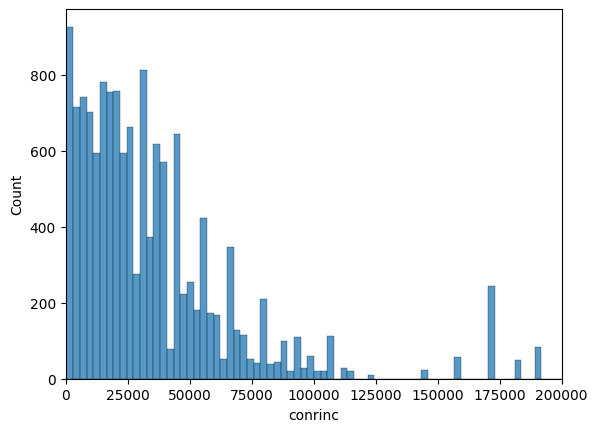

In [ ]:
sns.histplot(data=data, x='conrinc')
plt.xlim(0, 200000)
plt.show() #Exclduing reported income of 200k-400k to get a better understanding

There are some outliers past the 125000 conrinc mark, however, most of the density is concentrated between 0 and 50000. After 50000 the count starts to taper off until it is nearly negligable around 100000. To better illustrate this, below we plot density against conrinc values.

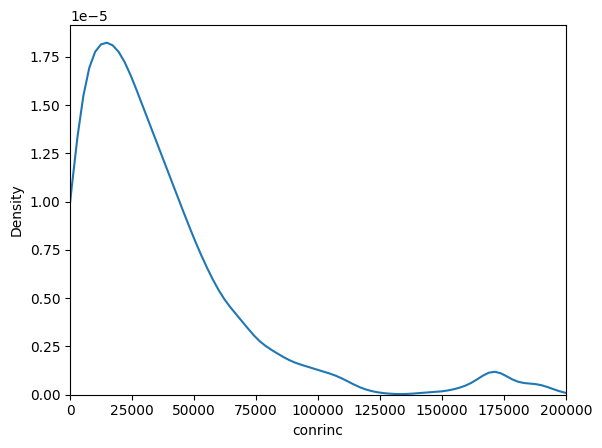

In [ ]:
sns.kdeplot(df['conrinc'])
plt.xlim(0, 200000)
plt.show() #Exclduing reported income of 200k-400k to get a better understanding
#Just like histogram, reveals a curve weighted towards the right indicating
# the mean is likely skewed to a higher value. Median is likely better interpretation

As mentioned before, there a much more density in the early part of the graph, which appears to peak just before the 25000 mark. By understanding how the density is distributed here, we know that a mean would be biased towards higher conrinc values. Therefore, a median value would do a better job of describing our data's distribution.

In [ ]:
data['conrinc'].median()
#About 11,000 lower which is not surpring after seeing denisty and hist plot
#Median will be used as the measure of comparison instead

26991.25

The median is about 27000, which is much less than our mean of 37000.

### More Cleaning
Removing Null values for Race, Sex, Health, and Degree

In [ ]:
# Overall process:
# 1) drop null values
# 2) get unique values for column
# 3) print to see what the unique columns are

# Race
data = data.dropna(subset=['race'])
unique_races = data['race'].unique()
for race in unique_races:
    print(race)


print('\n')

# Sex
data = data.dropna(subset=['sex'])
unique_sexes = data['sex'].unique()
for sex in unique_sexes:
    print(sex)

print('\n')

# Health
data = data.dropna(subset=['health'])
unique_health = data['health'].unique()
for health in unique_health:
    print(health)

print('\n')

# Degree
data = data.dropna(subset=['degree'])
unique_degree = data['degree'].unique()
for degree in unique_degree:
    print(degree)

white
black
other


male
female


poor
good
excellent
fair


high school
bachelor's
associate/junior college
graduate
less than high school


Above are all of the unique values that are in each variable. It should also be noted that the data only has white and black labeled, with all other groups being put into an 'other' category. In addition the 'sex' variable only records a person's sex at birth and should not be mistaken for the gender they identify as. Including gender information could potentially show more interesting results / trends that are not obvious from what we currently have. The health and degree information seems to be adequate though.

## Visualization and Analysis

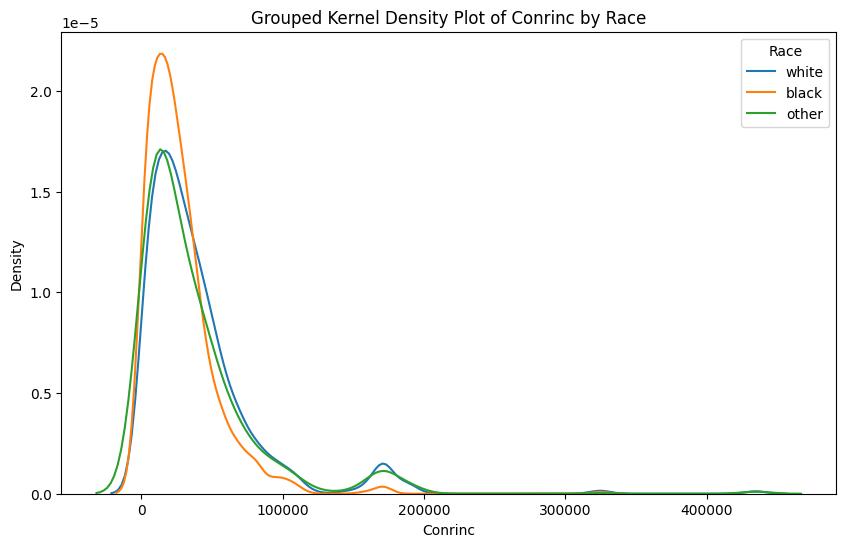

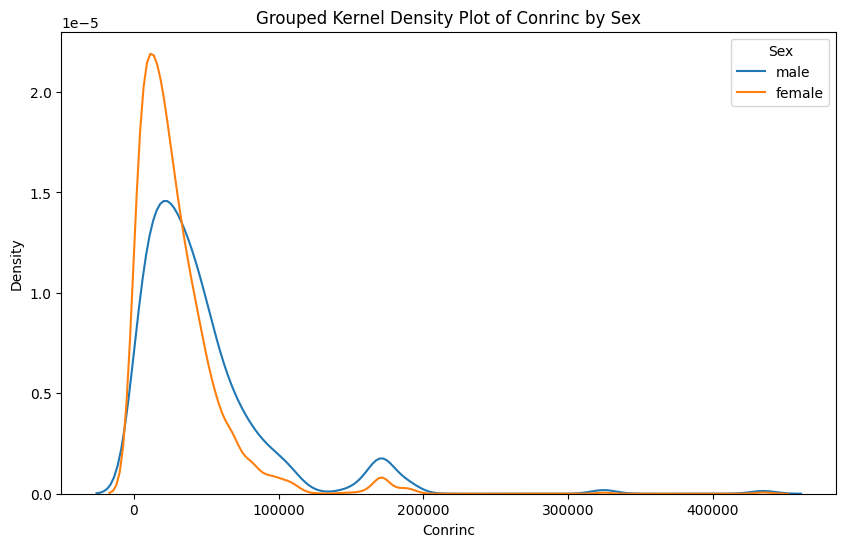

<ipython-input-12-52ab27ac090c>:43: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data[data['marital'] == marital], x='conrinc', label=marital)


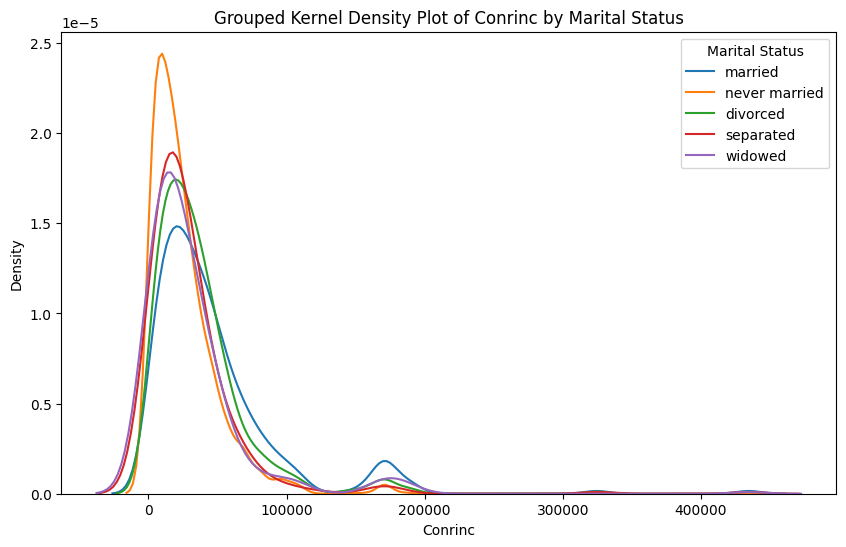

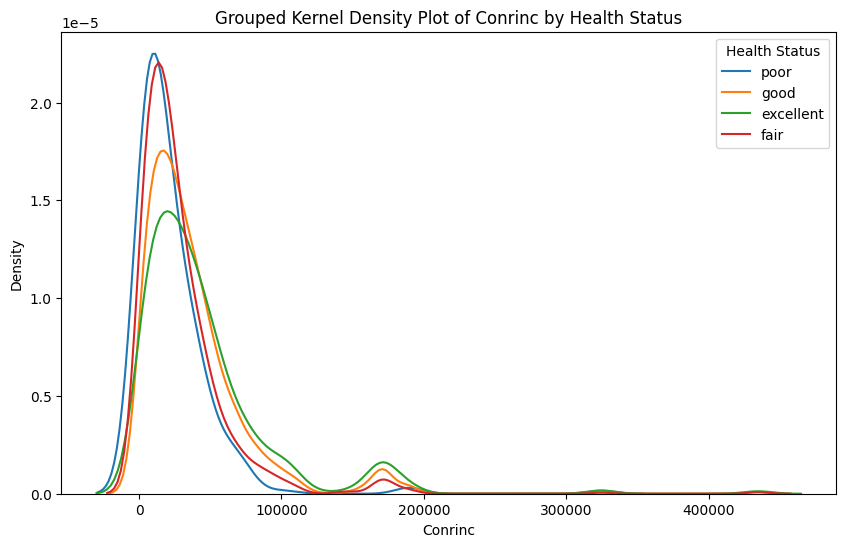

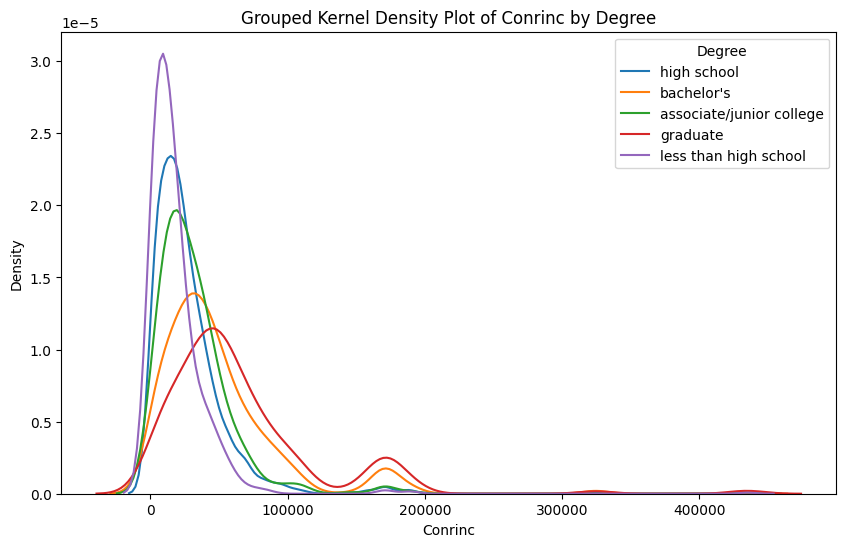

In [ ]:
# Initial Graph

# plt.figure(figsize=(12, 6))
# sns.kdeplot(data=data, x='conrinc', hue='degree', multiple='stack')
# plt.title('Grouped Kernel Density Plot of Age by Sex')
# plt.xlabel('Age')
# plt.ylabel('Density')
# plt.show()

# Opted to go with this format where we iterate through unique values in the column for a cleaner look with less of the NA values in the columns

# Grouped Kernel Density Plot for Race

# Set Figure Size
plt.figure(figsize=(10, 6))
for race in data['race'].unique():
    sns.kdeplot(data=data[data['race'] == race], x='conrinc', label=race)

# Title, Labels, Legend
plt.title('Grouped Kernel Density Plot of Conrinc by Race')
plt.xlabel('Conrinc')
plt.ylabel('Density')
plt.legend(title='Race', loc='upper right')

# Display
plt.show()

# Repeat the format above but for other columns

# Grouped Kernel Density Plot for Sex
plt.figure(figsize=(10, 6))
for sex in data['sex'].unique():
    sns.kdeplot(data=data[data['sex'] == sex], x='conrinc', label=sex)
plt.title('Grouped Kernel Density Plot of Conrinc by Sex')
plt.xlabel('Conrinc')
plt.ylabel('Density')
plt.legend(title='Sex')
plt.show()

# Grouped Kernel Density Plot for Marriage Status
plt.figure(figsize=(10, 6))
for marital in data['marital'].unique():
    sns.kdeplot(data=data[data['marital'] == marital], x='conrinc', label=marital)
plt.title('Grouped Kernel Density Plot of Conrinc by Marital Status')
plt.xlabel('Conrinc')
plt.ylabel('Density')
plt.legend(title='Marital Status')
plt.show()

# Grouped Kernel Density Plot for Health
plt.figure(figsize=(10, 6))
for health in data['health'].unique():
    sns.kdeplot(data=data[data['health'] == health], x='conrinc', label=health)
plt.title('Grouped Kernel Density Plot of Conrinc by Health Status')
plt.xlabel('Conrinc')
plt.ylabel('Density')
plt.legend(title='Health Status')
plt.show()

# Grouped Kernel Density Plot for Degree
plt.figure(figsize=(10, 6))
for degree in data['degree'].unique():
    sns.kdeplot(data=data[data['degree'] == degree], x='conrinc', label=degree)
plt.title('Grouped Kernel Density Plot of Conrinc by Degree')
plt.xlabel('Conrinc')
plt.ylabel('Density')
plt.legend(title='Degree')
plt.show()

The density distribution of white and other races appears to be nearly identical, but black has a notably higher density around the median. It appears that there is a higher density of female data around the median when compared to the male density. Health status and marital status both don't show any particularly interesting distributions. However, the 'Degree' Grouped Kernel Density plot is has a very visable trend. Here, it is evident that the density decreases as the level of education increases. This makes sense because less and less people continue their education past a certain point and that would be reflected in the people being surveyed. In addition, the density found around higher conrinc values appears to most prevelently be from higher education (more school has a higher probability of having a higher average income). Most of the outliers in this graph are from higher education levels as well. Finally, the smoothness of each graph appears to be correlated with the education level. 'Less than high school' has the sharpest peak, which progressivly smoothes out until 'graduate' reaches a rounded peak.

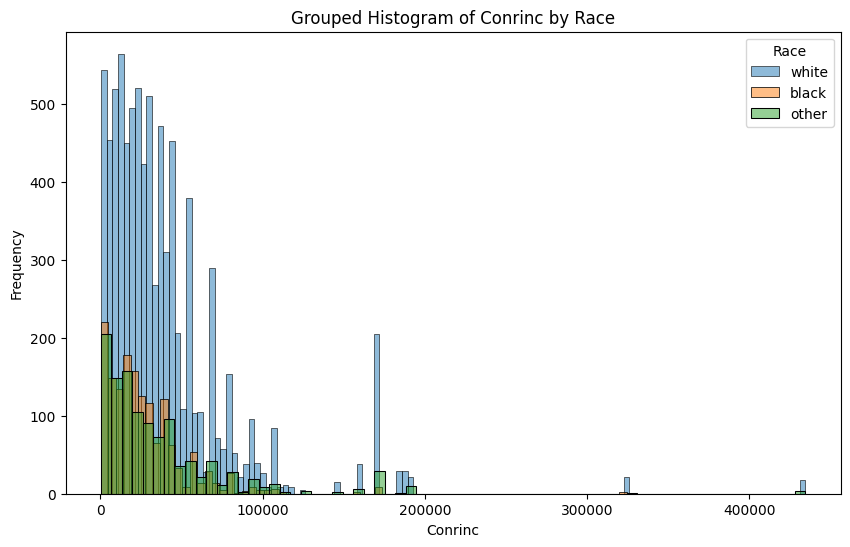

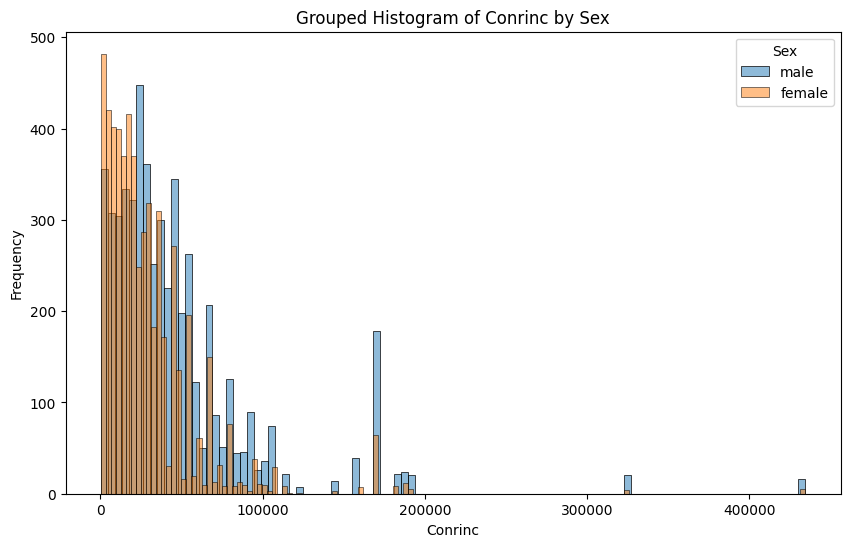

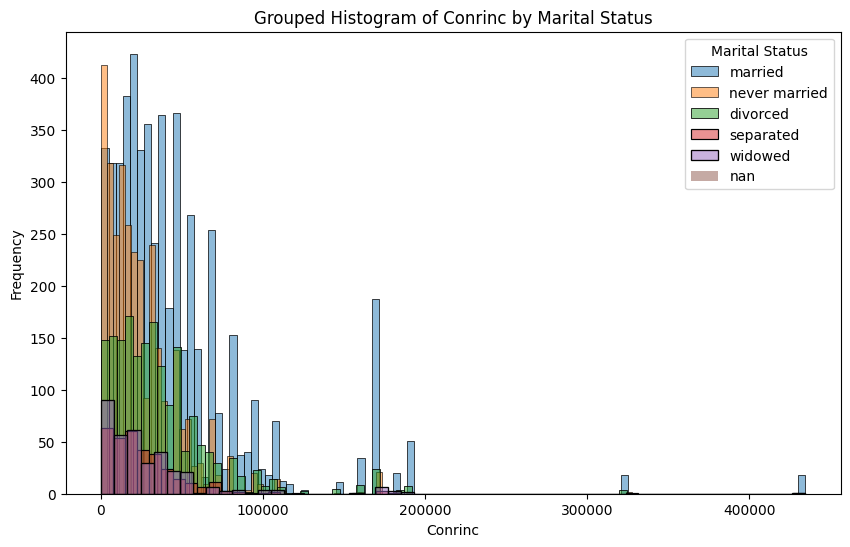

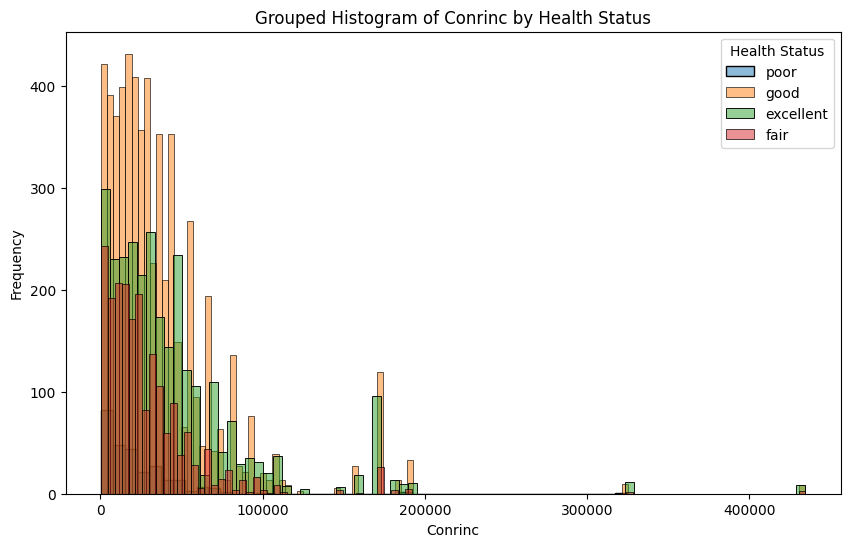

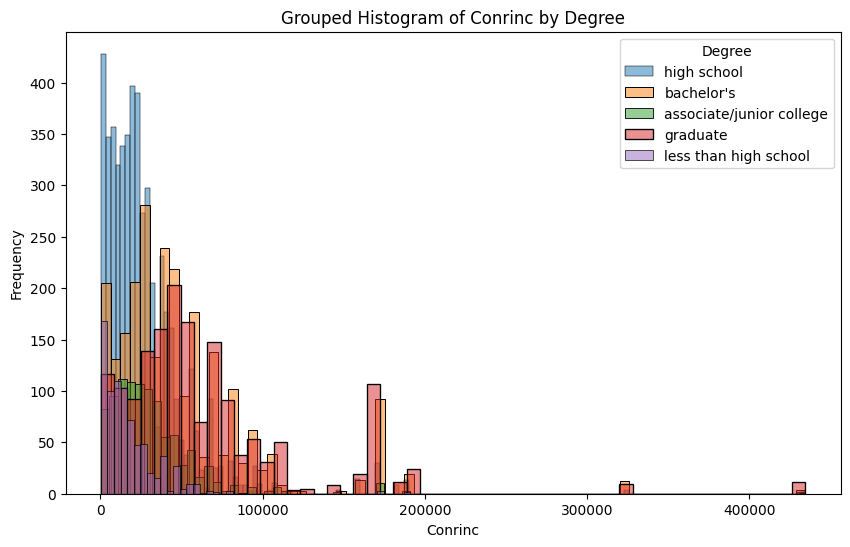

In [ ]:
# Grouped Histogram for Race
plt.figure(figsize=(10, 6))

# Same reasoning as the KDP plots
for race in data['race'].unique():
    sns.histplot(data=data[data['race'] == race], x='conrinc', label=race, alpha=0.5)

# title, labels, legend
plt.title('Grouped Histogram of Conrinc by Race')
plt.xlabel('Conrinc')
plt.ylabel('Frequency')
plt.legend(title='Race', loc='upper right')

# Display graph
plt.show()

# Repeat the format above but for other columns

# Grouped Histogram for Sex
plt.figure(figsize=(10, 6))
for sex in data['sex'].unique():
    sns.histplot(data=data[data['sex'] == sex], x='conrinc', label=sex, alpha=0.5)
plt.title('Grouped Histogram of Conrinc by Sex')
plt.xlabel('Conrinc')
plt.ylabel('Frequency')
plt.legend(title='Sex')
plt.show()

# Grouped Histogram for Marital Status
plt.figure(figsize=(10, 6))
for marital in data['marital'].unique():
    sns.histplot(data=data[data['marital'] == marital], x='conrinc', label=marital, alpha=0.5)
plt.title('Grouped Histogram of Conrinc by Marital Status')
plt.xlabel('Conrinc')
plt.ylabel('Frequency')
plt.legend(title='Marital Status')
plt.show()

# Grouped Histogram for Health Status
plt.figure(figsize=(10, 6))
for health in data['health'].unique():
    sns.histplot(data=data[data['health'] == health], x='conrinc', label=health, alpha=0.5)
plt.title('Grouped Histogram of Conrinc by Health Status')
plt.xlabel('Conrinc')
plt.ylabel('Frequency')
plt.legend(title='Health Status')
plt.show()

# Grouped Histogram for Degree
plt.figure(figsize=(10, 6))
for degree in data['degree'].unique():
    sns.histplot(data=data[data['degree'] == degree], x='conrinc', label=degree, alpha=0.5)
plt.title('Grouped Histogram of Conrinc by Degree')
plt.xlabel('Conrinc')
plt.ylabel('Frequency')
plt.legend(title='Degree')
plt.show()


These histograms tell a similar story as the previous Kernel Density plots. Other than the actual trends being plotted, the visual experience is quite different. The kernel density plots made it easier to differentiate the various changing values, however in my opinion, the histograms make higher frequencies stand out more. Since they are transposed on top of each other, we can see higher frequencies pop out more as opposed to areas with a greater overlap (which is beneficial in certain situations). For example, if the author of a report wanted to make the contrast between certain statistics pop out more then this would be a good choice to use. A plot that shows this well is the 'Grouped Histogram of Conrinc by Degree', which has a spot where only Blue (high school degree) is seen but also spots where the colors are almost indistinguishable.

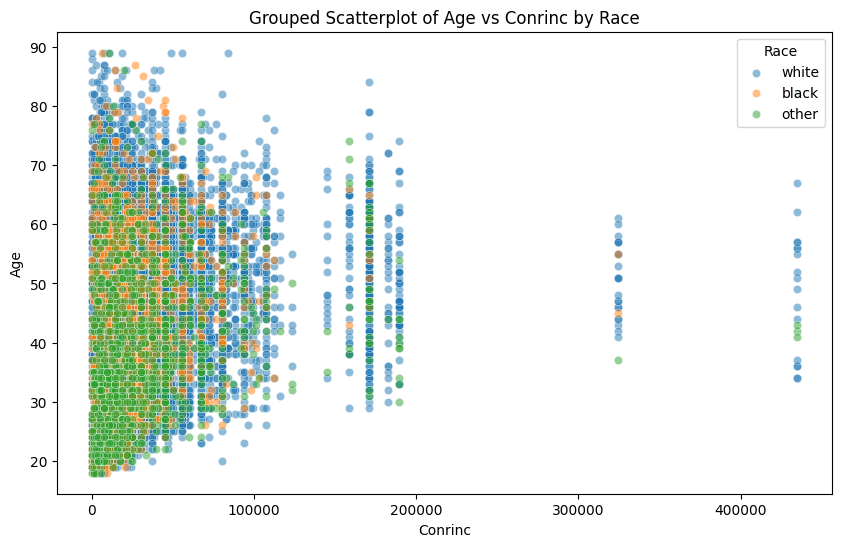

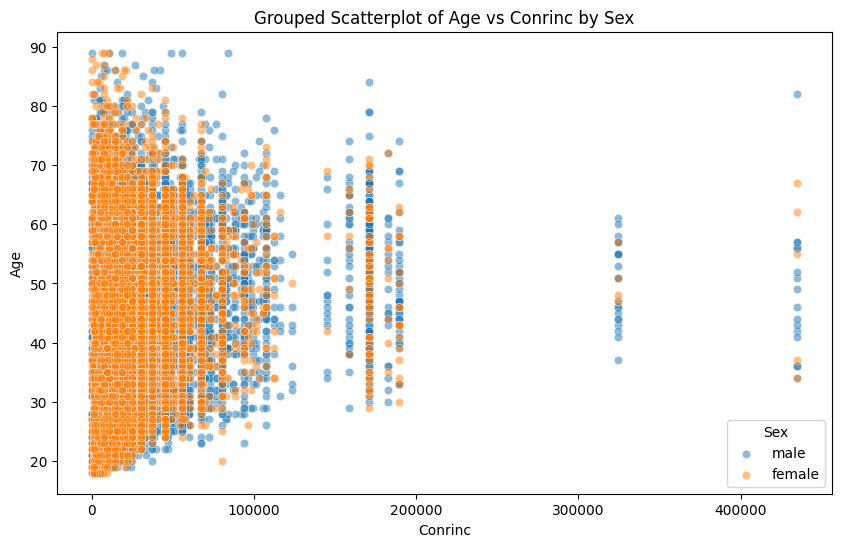

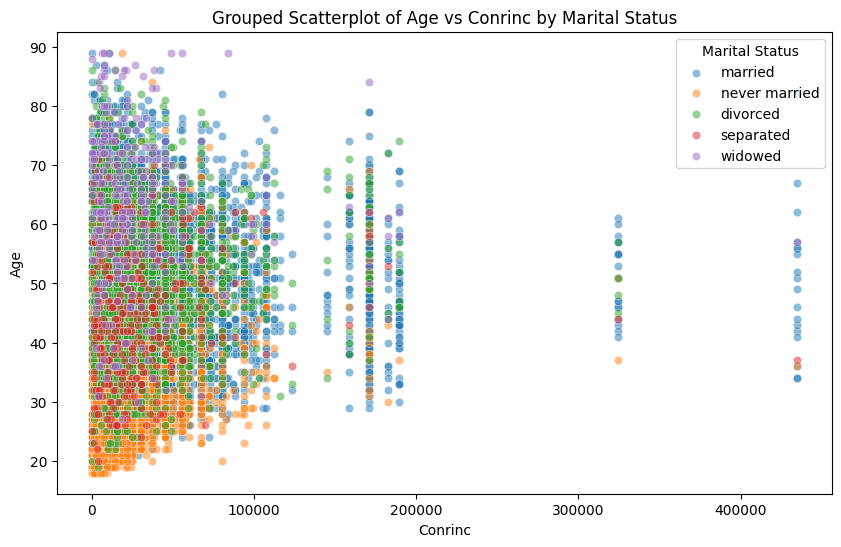

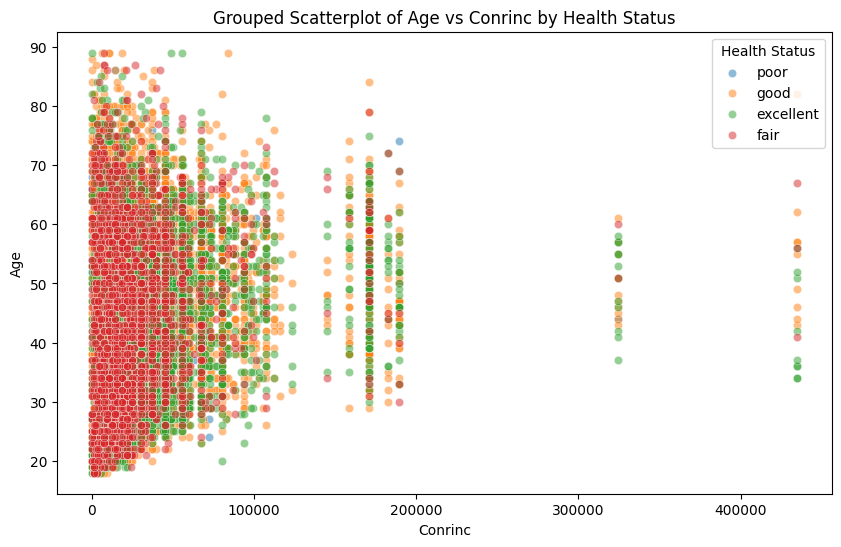

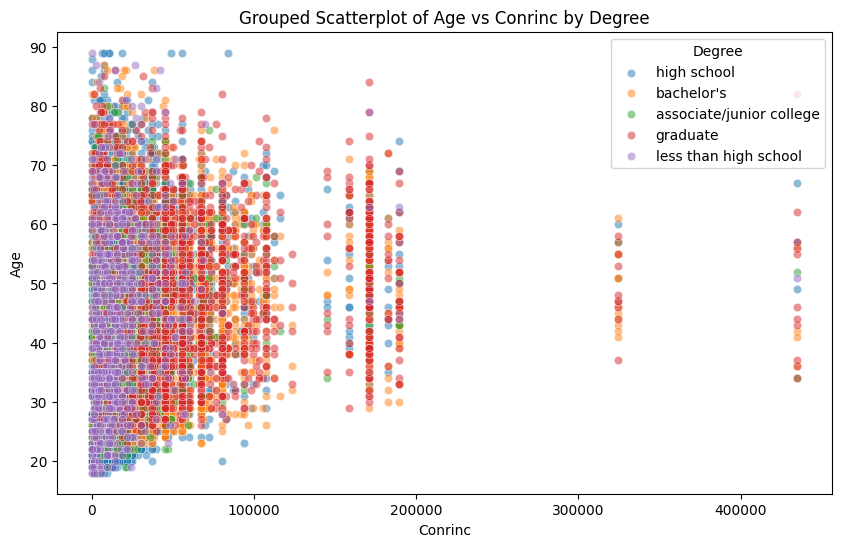

In [ ]:
# Grouped Scatterplot for Race
plt.figure(figsize=(10, 6))
for race in data['race'].unique():
    sns.scatterplot(data=data[data['race'] == race], x='conrinc', y='age', label=race, alpha=0.5)
plt.title('Grouped Scatterplot of Age vs Conrinc by Race')
plt.xlabel('Conrinc')
plt.ylabel('Age')
plt.legend(title='Race', loc='upper right')
plt.show()

# Repeat the format above but for other columns

# Grouped Scatterplot for Sex
plt.figure(figsize=(10, 6))
for sex in data['sex'].unique():
    sns.scatterplot(data=data[data['sex'] == sex], x='conrinc', y='age', label=sex, alpha=0.5)
plt.title('Grouped Scatterplot of Age vs Conrinc by Sex')
plt.xlabel('Conrinc')
plt.ylabel('Age')
plt.legend(title='Sex')
plt.show()

# Grouped Scatterplot for Marital Status
plt.figure(figsize=(10, 6))
for marital in data['marital'].unique():
    sns.scatterplot(data=data[data['marital'] == marital], x='conrinc', y='age', label=marital, alpha=0.5)
plt.title('Grouped Scatterplot of Age vs Conrinc by Marital Status')
plt.xlabel('Conrinc')
plt.ylabel('Age')
plt.legend(title='Marital Status')
plt.show()

# Grouped Scatterplot for Health Status
plt.figure(figsize=(10, 6))
for health in data['health'].unique():
    sns.scatterplot(data=data[data['health'] == health], x='conrinc', y='age', label=health, alpha=0.5)
plt.title('Grouped Scatterplot of Age vs Conrinc by Health Status')
plt.xlabel('Conrinc')
plt.ylabel('Age')
plt.legend(title='Health Status')
plt.show()

# Grouped Scatterplot for Degree
plt.figure(figsize=(10, 6))
for degree in data['degree'].unique():
    sns.scatterplot(data=data[data['degree'] == degree], x='conrinc', y='age', label=degree, alpha=0.5)
plt.title('Grouped Scatterplot of Age vs Conrinc by Degree')
plt.xlabel('Conrinc')
plt.ylabel('Age')
plt.legend(title='Degree')
plt.show()


For the Grouped Scatterplots, their use is pretty much the same as the Grouped Histograms. Unlike in the histograms though, I believe that outliers are better visually represented here.

In [ ]:
data.loc[:,['conrinc','year']].groupby('year').median()

,conrinc
year,
2006,24258.00
2008,26991.25
2010,22082.50
2012,21065.00
2014,24017.50
2016,27225.00
2018,26287.50
2021,30240.00
2022,30240.00


It appears that over time the conrinc median has been growing. In 16 years it went from 24000 to 30000, but most of the growth occured in the last few years.

In [ ]:
data.loc[:,['conrinc','sex']].groupby('sex').median()

,conrinc
sex,
male,34470.0
female,21840.0
don't know,NaN
iap,NaN
I don't have a job,NaN
"dk, na, iap",NaN
no answer,NaN
not imputable_(2147483637),NaN
not imputable_(2147483638),NaN


In [ ]:
data.loc[:,['conrinc','age']].groupby('age').median()

,conrinc
age,
18.0,1764.000
19.0,2996.875
20.0,5327.875
21.0,6633.500
22.0,9924.000
...,...
85.0,13020.000
86.0,14280.000
87.0,7560.000


In [ ]:
data.loc[:,['conrinc','race']].groupby('race').median()

,conrinc
race,
white,30240.0
black,21840.0
other,24258.0
don't know,NaN
iap,NaN
I don't have a job,NaN
"dk, na, iap",NaN
no answer,NaN
not imputable_(2147483637),NaN


In [ ]:
data.loc[:,['conrinc','marital']].groupby('marital').median()

,conrinc
marital,
married,34470.0
widowed,20322.5
divorced,30240.0
separated,21840.0
never married,18745.0
don't know,NaN
iap,NaN
I don't have a job,NaN
"dk, na, iap",NaN


In [ ]:
data.loc[:,['conrinc','health']].groupby('health').median()

,conrinc
health,
excellent,32670.000
good,28668.000
fair,20950.000
poor,15831.875
don't know,NaN
iap,NaN
I don't have a job,NaN
"dk, na, iap",NaN
no answer,NaN


This shows that the median conrinc of people in excellent health tends to be much more than those of people with poor health. Specifically, the median conrinc of excellent health workers is twice as high.

In [ ]:
data.loc[:,['conrinc','degree']].groupby('degree').median()

,conrinc
degree,
less than high school,13495.625
high school,21065.000
associate/junior college,25200.000
bachelor's,38555.000
graduate,49882.500
don't know,NaN
iap,NaN
I don't have a job,NaN
"dk, na, iap",NaN


This final table reflects the overall trend that has been seen throughout this report. As the education level increases, there is a rise in conrinc (inflation adjusted annual income).

## Conclusion

The table below summarizes variables and factors found to correlate to higher and lower median incomes, per our results above:

<center>

| Variable | Higher | Lower |
| -------- | ------ | ----- |
| Degree | Graduate | Less than high school |
| Health | Excellent | Poor |
| Marital Status | Married | Never Married |
| Race | White | Black |
| Sex | Male | Female |

</center>

These results indicate a trend in that people with certain characteristics tend to have higher incomes compared to those without. In other words, we found evidence of income disparity with respect to variables including race, health, marital status, highest level of education, and sex.

A potential critique this project could face is the effect of outliers upon the results. However, this has been minimized by considering the median as opposed to the mean. Rather than sum all data points and take the average (where more outliers on either side carry unnaturally heavy weight), we used the median, the most central point of the dataset. This is under the assumption the most common data will be grouped together near the middle, and reinforced by seeing the high concentration of points near the median as visible in the grouped kernel density graphs.

Others may observe how in the kernel density plots and histograms, there is a second peak near the \\$200,000 mark. They may ask why those values are not being discussed as thoroughly when it appears to make up a noticable subset of the results. However, in addition to those independent trends reinforcing the above (most incomes above that range are for people who are at least one of white, male, good health, etc), it doesn't make up a large population of the sample. More than 75% of individuals in the survey have incomes less than \\$50,000; very very few are in the minority with incomes above the \\$150,000 mark. Therefore, because our discussion focuses on regular, average individuals, the effect of these outliers are minimized by looking at median income of different samples.

One limitation of this project is that these variables and factors are generally being taken in isolation, and simply represent the statistics of the sample surveyed. It is not reasonable for a supposed reader to definitively say "I have a graduate degree, am in excellent health, married, and am a white male; my income must be greater than someone who does not meet these same thresholds." Rather, it serves as a point of reflection that people with these characteristics tend to have greater incomes than those without.

Furthermore, it does not address the rationale for *why* these trends exist and are present. Some may be by chance, others due to systemic issues within society. Still others may just be a proxy for other questions and data points which fall outside the scope of this project. For example, people who were married, widowed, or divorced have a median income at least $10,000 greater than people who were never married - is this an independent result, or a proxy for age? Similarly, people in excellent health have a median income more than double people in poor health (\\$32,670 vs \\$15,831) - is this due to the fact people in poor health are not able to work as much, need to take sick days, and then result in a limited income due to a more limited ability to work?